**Week 4:**
# Temporal Difference Methods
- SARSA
- Q-learning

In [1]:
import numpy as np
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Epsilon-greedy policy
def epsilon_greedy(Q: np.ndarray, state: int, epsilon: float):
    if np.random.random() < epsilon:
        return np.random.choice(Q.shape[-1])
    return np.argmax(Q[state], axis=-1)

## SARSA
<img src="sut_sarsa.png" alt="MC Prediction"/>

In [4]:
# SARSA algorithm
def SARSA(
    env, epsilon: float, alpha: float, gamma: float, num_episodes: int = 500
) -> tuple:
    # initialize action-value function(Q table)
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = np.zeros(shape=(nS, nA))

    # Initialize lists to store statistics
    reward_hist = np.zeros(shape=(num_episodes,))
    episode_lengths = np.zeros(shape=(num_episodes,))

    for i in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        episode_length = 0
        action = epsilon_greedy(Q, state, epsilon)
        # Single-episode pass
        while True:
            # next_action = epsilon_greedy(Q, next_state, epsilon)
            # episode_reward += reward
            # next_state, reward, terminated, truncated, _ = env.step(action)
            #     break
            # state = next_state
            # Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            # action = next_action
            # if terminated or truncated:
            # episode_length += 1


        reward_hist[i] = episode_reward
        episode_lengths[i] = episode_length
    return Q, reward_hist, episode_lengths

## Q-learning
<img src="sut_qlearning.png" alt="MC Prediction"/>

In [5]:
# Q-learning algorithm
def Q_learning(
    env, epsilon: float, alpha: float, gamma: float, num_episodes: int = 500
) -> tuple:
    # Initialize action-value function (Q table)
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = np.zeros(shape=(nS, nA))

    # Initialize lists to store statistics
    reward_hist = np.zeros(shape=(num_episodes,))
    episode_lengths = np.zeros(shape=(num_episodes,))

    for i in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        episode_length = 0
        # Single-episode pass
        while True:
            # TODO: set the lines in the right order
            # action = epsilon_greedy(Q, state, epsilon)
            #     break
            # episode_reward += reward
            # Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state].max() - Q[state, action])
            # if terminated or truncated:
            # state = next_state
            # next_state, reward, terminated, truncated, _ = env.step(action)
            # episode_length += 1
            
        reward_hist[i] = episode_reward
        episode_lengths[i] = episode_length
    return Q, reward_hist, episode_lengths

## Expected SARSA
> **TakeHOME !**

**Run comparison**

In [10]:
def run_q_sarsa_comparison(
    env,
    num_episodes: int,
    epsilon: float,
    alpha: float,
    gamma: float,
) -> tuple:
    reward_hist_Q = np.zeros(shape=(1, 500))
    reward_hist_SAR = np.zeros(shape=(1, 500))
    episode_lengths_Q = np.zeros(shape=(1, 500))
    episode_lengths_SAR = np.zeros(shape=(1, 500))

    
    Q_SARSA, reward_hist_SAR, episode_lengths_SAR = SARSA(env, epsilon, alpha, gamma, num_episodes)     
    print("SARSA Done!")
    Q_Q, reward_hist_Q, episode_lengths_Q = Q_learning(env, epsilon, alpha, gamma, num_episodes)   
    print("Q-learning Done!")
    return (episode_lengths_Q, episode_lengths_SAR),(reward_hist_Q, reward_hist_SAR),(Q_Q, Q_SARSA)

In [8]:
# Hyperparameters
epsilon = 0.1
alpha = 0.5
gamma = 1.0
num_episodes = 500

In [11]:
# Create environment
env = gym.make("CliffWalking-v0")

# Run the comparison
histories = run_q_sarsa_comparison(
    env=env,
    num_episodes=num_episodes,
    epsilon=epsilon,
    alpha=alpha,
    gamma=gamma,
)

SARSA Done!
Q-learning Done!


> **TODO:** Reapeat the procedure for different runs

**Visualization**

In [13]:
# Unpack
(episode_lengths_Q, episode_lengths_SARSA),(reward_hist_Q, reward_hist_SARSA), _ = histories
algo_Q, algo_SARSA = ('Q-learning', 'SARSA')

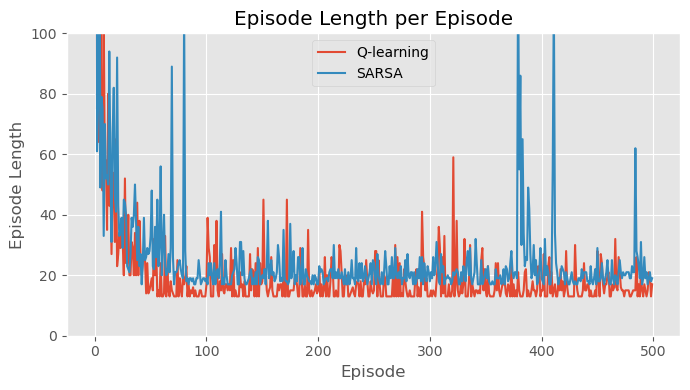

In [14]:
# Plot 1: Episode Length vs. Episode
plt.figure(figsize=(7, 4))
plt.plot(episode_lengths_Q, label=algo_Q)
plt.plot(episode_lengths_SARSA, label=algo_SARSA)
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length per Episode')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

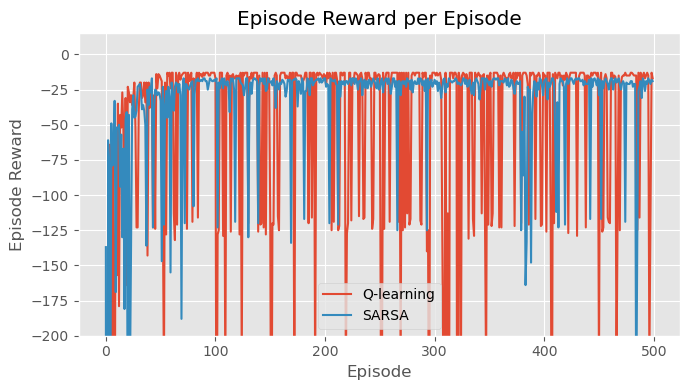

In [15]:
# Plot 2: Episode Reward vs. Episode
plt.figure(figsize=(7, 4))
plt.plot(reward_hist_Q, label=algo_Q)
plt.plot(reward_hist_SARSA, label=algo_SARSA)
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.title('Episode Reward per Episode')
plt.legend()
plt.grid(True)
plt.ylim(-200, 15)
plt.tight_layout()
plt.show()

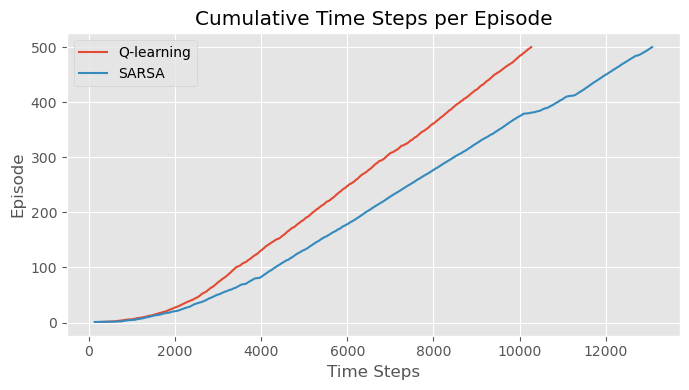

In [16]:
cumulative_steps_Q = np.cumsum(episode_lengths_Q)
cumulative_steps_SARSA = np.cumsum(episode_lengths_SARSA)

# Plot 3: Cumulative Time Steps vs. Episode
plt.figure(figsize=(7, 4))
plt.plot(cumulative_steps_Q, range(1, num_episodes + 1), label=algo_Q)
plt.plot(cumulative_steps_SARSA, range(1, num_episodes + 1), label=algo_SARSA)

plt.ylabel('Episode')
plt.xlabel('Time Steps')
plt.title('Cumulative Time Steps per Episode')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot value function and policy**

In [17]:
# TODO

In [18]:
# Unpack the Qs
_, _, (Q_Q, Q_SARSA) = histories

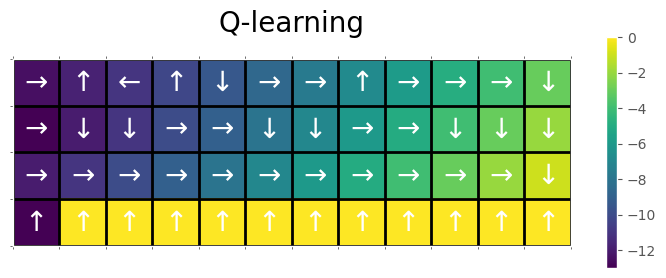

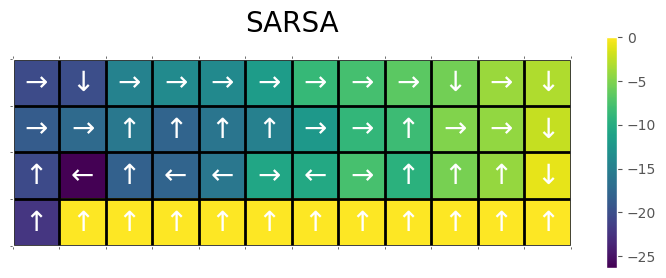